## Interpretability of models with SHAP

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')
data


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [22]:
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]

X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [23]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

print(shap_values)

[array([[ 2.14045350e-01, -2.11501004e-02,  4.66721751e-02,
         2.28475677e-02, -1.08748824e-02, -1.92050793e-02,
        -3.46666728e-03, -4.41675941e-04,  3.20476249e-02,
         2.89423189e-03, -1.00742194e-01, -2.77881175e-02,
        -1.40882409e-02, -2.55323026e-03,  1.52616934e-03,
        -4.84691547e-05, -4.00852716e-04,  1.97639121e-03],
       [-8.83391460e-02, -2.00116905e-02, -2.76173642e-03,
        -1.32580228e-02,  8.07933902e-03, -1.10261221e-02,
        -2.01306572e-02, -8.01843773e-03, -2.54964442e-02,
        -1.17154873e-02,  1.78164245e-02,  4.41079660e-03,
         5.46251446e-02,  8.57632567e-03, -2.61282228e-03,
        -1.52447356e-04, -9.85215282e-04,  2.25019885e-03],
       [-7.57556968e-02, -1.38656436e-02, -4.10659229e-02,
        -5.34750073e-02, -7.84091722e-03, -1.28944568e-02,
        -9.91930022e-03,  2.58313452e-03, -1.01171521e-02,
         4.88233879e-02, -2.52599033e-02, -8.08380312e-03,
         3.34446095e-02,  2.47304746e-03, -8.13289379

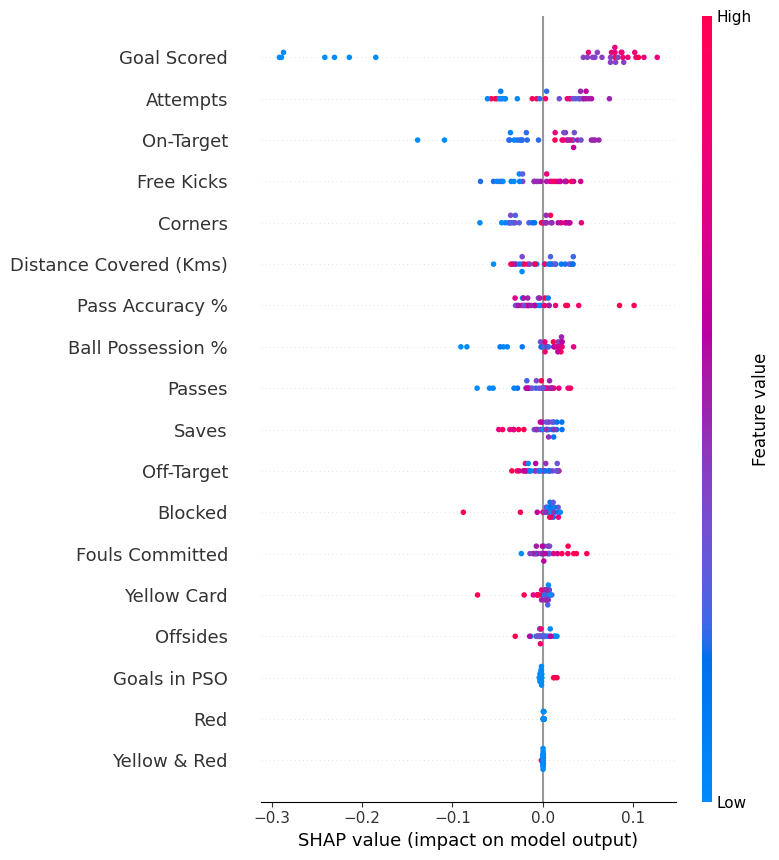

In [24]:
# Make plot. Index of [1] is explained in text below. -- variable impact of winning football match is captured in 1
shap.summary_plot(shap_values[1], val_X)

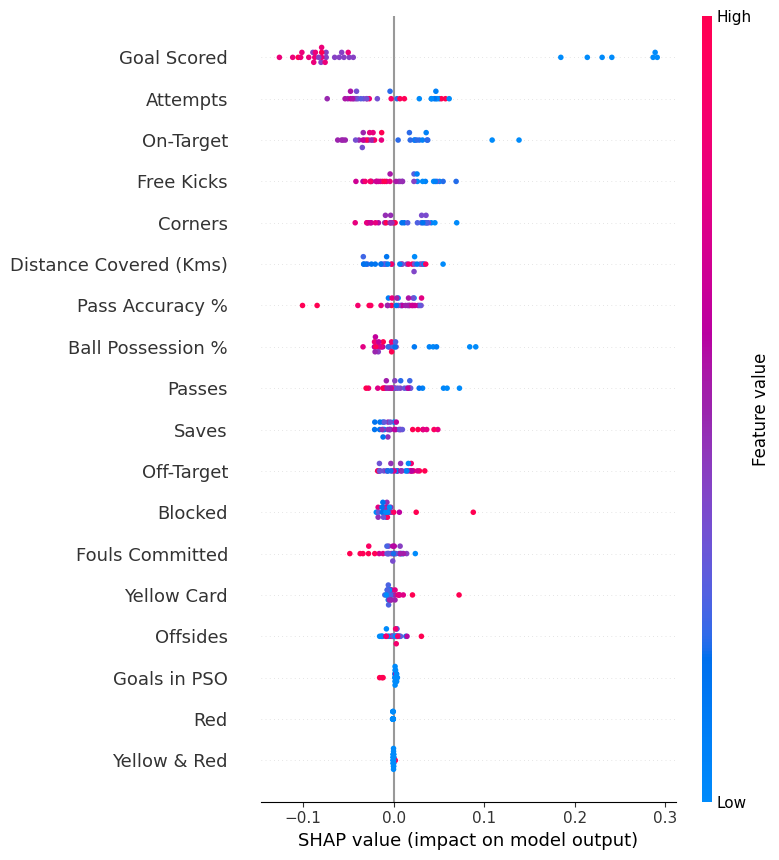

In [25]:
# Make plot. Index of [1] is explained in text below. -- variable impact of loosing football match is captured in 0
shap.summary_plot(shap_values[0], val_X)

In [26]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.29, 0.71]])

In [27]:
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction_array)

In [28]:
#use anaconda prompt in admin mode
# pip install ipywidgets
# jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [29]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction_array)

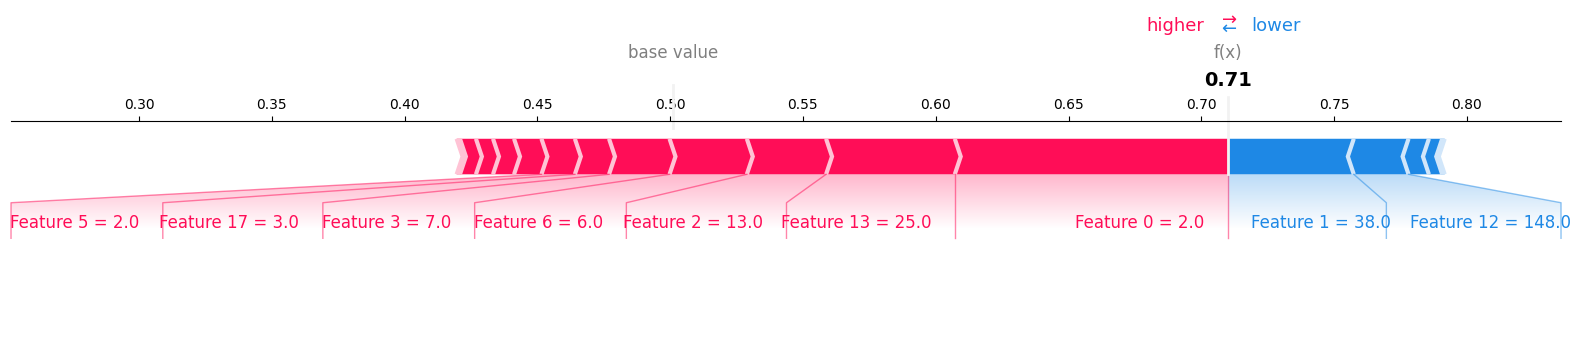

In [30]:
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction_array, matplotlib=True)